In [ ]:
#임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#사이킷런 -> 머신러닝 알고리즘을 제공하는 라이브러리!
#datasets라는 모듈 -> 분류, 회귀, 군집화, 차원축소 등에 쓰이는 데이터를 불러오기 쉽게 만들어놓음
from sklearn import datasets

In [ ]:
#엑셀파일 써도 되는데!-> 이렇게도 쓸수있다~
data = datasets.load_iris()

In [ ]:
#data : X(features) -> 머신러닝 훈련 시에 쓰이는 특성 데이터
#target : Y(labels) -> 머신러닝 정답지(비지도..!)
#feature_names : X라는 특성의 이름
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
#data : X(features)
#iris(붓꽃 데이터) -> 붓꽃의 꽃받침, 꽃잎 종류 데이터
data['data'][0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
#target : Y(labels) -> 붓꽃 무슨종류? '0'
data['target'][0]

np.int64(0)

In [ ]:
data['target'][140] #2번째 종류~

np.int64(2)

In [ ]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#1차원, 4개
data['data'][0].shape

(4,)

In [ ]:
# data.data = 꽃잎과 꽃받침의 너비, 길이를 표현하는 4차원의 데이터 (x1, x2, x3, x4)
X = pd.DataFrame(data['data'], columns=data['feature_names'])

# data.target = 어느품종에 속하는가를 0, 1, 2,
y = pd.DataFrame(data['target'], columns=['Species'])

#X와 y를 하나의 데이터 프레임으로 만들기 위해
#concat -> concatenate(붙임)
#axis = 0(행 방향으로(아래)붙이겠다), axis=1(열 방향(옆)으로 붙이겠다.)
df = pd.concat([X,y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#임포트
from sklearn.cluster import KMeans

#정의
#옵션? k의 개수!(n_clusters)
km = KMeans(n_clusters=3)

#훈련 -> 임의로 클래스를 나누는 행위
#비지도 학습은 X만 필요!
km.fit(X)

#예측 -> 클래스(라벨, 군집)를 나누는 행위
kms_predict = km.predict(X)

In [ ]:
#X를 가지고 군집화를 수행한 결과
print(km.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
#센트로이드 값
print(km.cluster_centers_)

[[5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


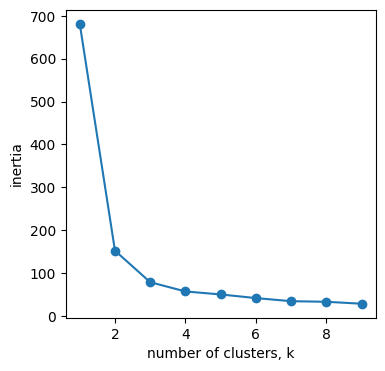

In [ ]:
#엘보우 그래프
#적절한 K에 대해 붓꽃 데이터프레임을 넣어 K와 inertia를 비교
#값(3)이 적합한 변화시점임을 알 수 있음
scope = range(1,10)
inertias = []

for k in scope:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

# K 개수와 inertia 비교 시각화
#그림의 크기를 정하는 부분(4,4)
plt.figure(figsize=(4, 4))

#점과 선으로 이루어진 그래프를 그리겠다,
#scope = x
#inertias = y
plt.plot(scope, inertias, '-o')

plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

#반경
#최소이웃의 수
db = DBSCAN(eps=0.3, min_samples=3)

#X만 넣어서 훈련을 진행함 -> 비지도학습
db.fit(X)

DBSCAN(eps=0.3, min_samples=3)

In [ ]:
print(db.labels_)

[ 0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1  0 -1  0 -1  0 -1  0
  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0
  0  0  1 -1  1  4  2 -1 -1 -1  2 -1 -1 -1 -1  3 -1  2 -1  4 -1  4  5 -1
 -1  3  2  2 -1 -1  3 -1  4  4  4 -1 -1 -1  1 -1  4  4  4  3  4 -1  4  4
  4  2 -1  4 -1  6 -1  7 -1 -1 -1 -1 -1 -1 -1 -1 -1  6 -1 -1  7 -1 -1 -1
  8 -1 -1  5  8 -1  5  5 -1 -1 -1 -1 -1 -1 -1 -1 -1  7  5 -1  8 -1  6  8
  8 -1  5 -1 -1  5]


In [ ]:
print(len(set(db.labels_)))

10


In [ ]:
#가우시안 믹스쳐 모델
from sklearn.mixture import GaussianMixture

gm = GaussianMixture()

gm.fit(X)

GaussianMixture()

In [ ]:
#실루엣 계수
#MSE, MAE -> metrics(평가 지표:모델이 잘 만들어졌는지 아닌지를 판단하는 역할)
from sklearn.metrics import silhouette_score

#비지도학습 -> 라벨이 없음! 임의로 나눠보는 것.
#우리가 쓴 데이터 -> 라벨이 있어!
#우리가 비지도학습 모델이 정말 잘 나눴을까? -> 실루엣 계수
km_pred = km.predict(X)

#실루엣계수(X, 내 모델이 군집화한값)
print(silhouette_score(X, km_pred))

0.551191604619592


In [ ]:
#dbscan fit_predict
db_pred = db.fit_predict(X)

#실루엣계수(X, 내 모델이 군집화한값)
print(silhouette_score(X, db_pred))

0.03169672127881764


In [ ]:
type(km_pred)

numpy.ndarray

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#df.iloc[행, 열]
df.iloc[:, 1]

,sepal width (cm),petal length (cm),petal width (cm)
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2


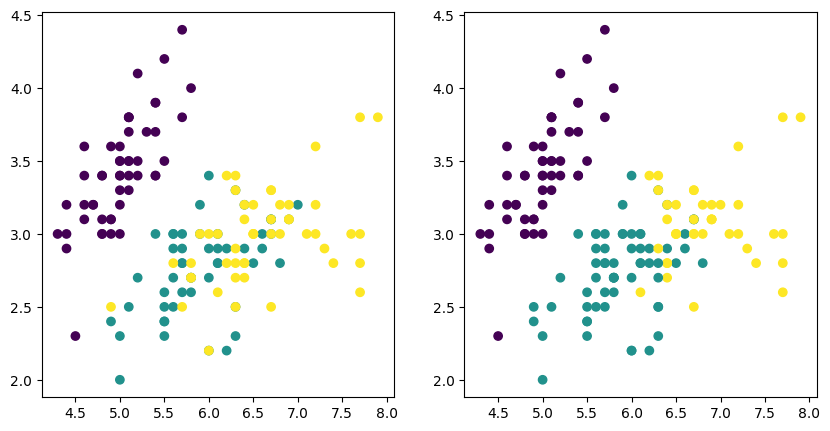

In [ ]:
#붓꽃데이터 -> 4차원(2개 열을 선택)
#군집화에 대한 시각화 그래프

x = df.iloc[:, 0]
y = df.iloc[:, 1]
c = df.iloc[:, 4]

x1 = df.iloc[:, 0]
y1 = df.iloc[:, 1]
c1 = km_pred

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].scatter(x, y, c=c)
axes[1].scatter(x1, y1, c=c1)

plt.show()

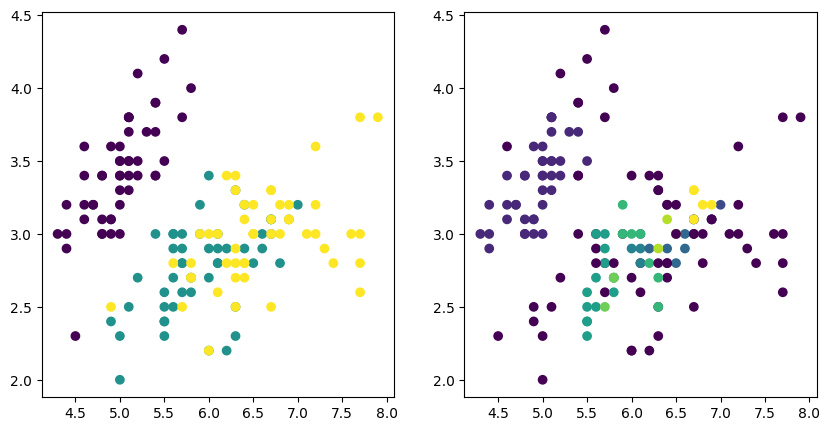

In [ ]:
#붓꽃데이터 -> 4차원(2개 열을 선택)
#군집화에 대한 시각화 그래프

x = df.iloc[:, 0]
y = df.iloc[:, 1]
c = df.iloc[:, 4]

x1 = df.iloc[:, 0]
y1 = df.iloc[:, 1]
c1 = db_pred

fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].scatter(x, y, c=c)
axes[1].scatter(x1, y1, c=c1)

plt.show()

In [ ]:
gm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
gm = GaussianMixture(n_components=2)
gm_pred = gm.fit_predict(X)
print(silhouette_score(X, gm_pred))

0.6867350732769777


In [ ]:
# fit. -> 훈련
# fit_transform -> 훈련 후에 변환
# fit_predict. -> 훈련 후에 예측
# predict -> 예측

In [ ]:
fit_predict()

In [ ]:
0~1
#0.3 (약하다)
#0.7 (강하다)